# Aplicação de Python na Agrometeorologia

Este Jupyter Notebook é parte integrande do curso de Python ministrado durante XXII Congresso Brasiliero de Agrometeorologia realizado nos dias 3, 4 e 5 de outubro de 2023 na cidade Natal/RN.

# Importação de bibliotecas

In [1]:
import pandas as pd

# Abertura do arquivo csv

Tratamento da coluna 'Dia' do DataFrame como DateTime e depois converte em index.

In [8]:
# Documentação:
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

df = pd.read_csv(
    '../output/chuva_diaria_cpc_19910901_20221231.csv',
    index_col='Dia', 
    parse_dates=True  
)

In [3]:
#Outra possibilidade de tratar a coluna 'Dia' como DateTime e depois converter em index:
# df['Dia'] = pd.to_datetime(df['Dia'])
# df.set_index('Dia', inplace=True)

Inspeção do DataFrame.

In [4]:
df

,Chuva
Dia,
1991-01-01,1.083005
1991-01-02,1.132334
1991-01-03,1.101605
1991-01-04,1.662441
1991-01-05,1.765939
...,...
2022-12-27,0.583862
2022-12-28,0.579153
2022-12-29,1.396807


Plot básico do DataFrame.

<AxesSubplot:xlabel='Dia'>

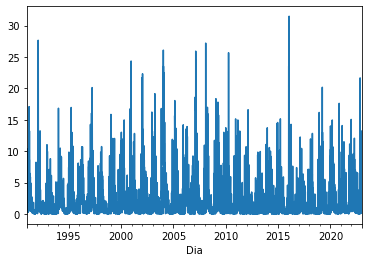

In [5]:
df['Chuva'].plot() # Outra possibilidade: df.Chuva.plot()

# Algumas transformações no DataFrame

## Meses mais chuvosos

In [6]:
# Documentação:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html

# Acumulado mensal.
chuva_acumulada1 = df.resample('MS').sum()

# Formata a data de forma a remover o dia.
chuva_acumulada1.index = chuva_acumulada1.index.strftime('%Y-%m')

# Renomeia o index de 'Dia' para 'Mes'.
chuva_acumulada1.index.name = 'Mes'

chuva_acumulada1

,Chuva
Mes,
1991-01,100.099646
1991-02,79.893940
1991-03,164.202329
1991-04,71.712449
1991-05,56.974305
...,...
2022-08,35.391962
2022-09,14.892078
2022-10,16.885503


Os 5 meses mais chuvosos.

<AxesSubplot:xlabel='Mes'>

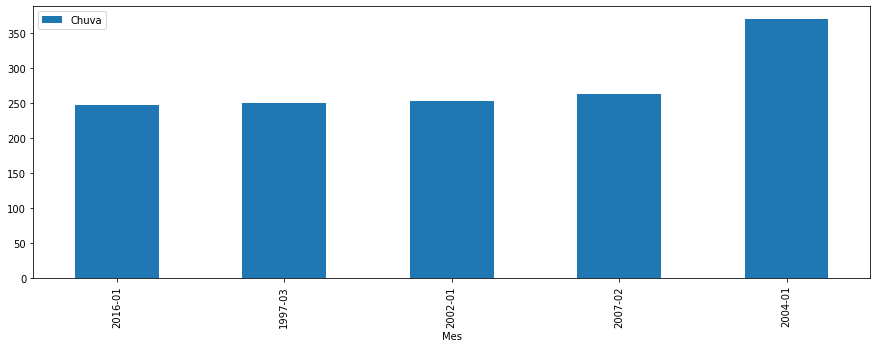

In [7]:
# 'Chuva' é a coluna do DataFrame.

NumeroMeses = 5
meses_mais_chuvoso = chuva_acumulada1.nlargest(NumeroMeses, 'Chuva')

# Ordena de forma crescente os valores dos meses mais chuvosos.
meses_mais_chuvoso.sort_values(by='Chuva').plot.bar(figsize=(15,5))